Pobieranie otwartych danych:

In [41]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout

Ustawienie hiperparametrów:

In [42]:
max_features = 10000# liczba słów traktowanych jako cechy
maxlen = 500# ograniczenie liczby słów w tekście
batch_size = 32

Pobieranie danych:

In [43]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Wstępne przetwarzanie danych szeregowych:

In [44]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

Tworzenie prostego modelu RNN:

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - acc: 0.6014 - loss: 0.6479 - val_acc: 0.7949 - val_loss: 0.4550
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - acc: 0.8243 - loss: 0.4146 - val_acc: 0.8208 - val_loss: 0.4200
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - acc: 0.8639 - loss: 0.3357 - val_acc: 0.8528 - val_loss: 0.3462
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - acc: 0.8917 - loss: 0.2776 - val_acc: 0.8440 - val_loss: 0.3678
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - acc: 0.9123 - loss: 0.2365 - val_acc: 0.8532 - val_loss: 0.3604


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,228 (2.46 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,115 (1.23 MB)

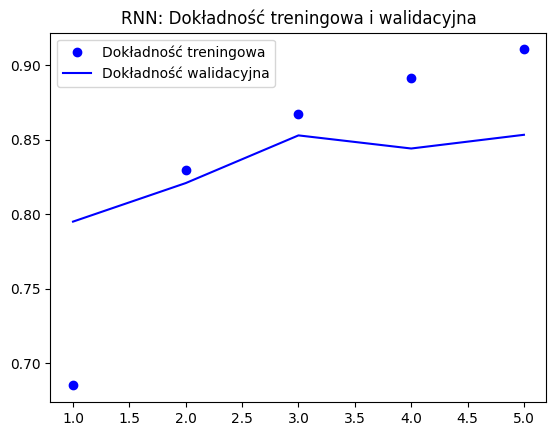

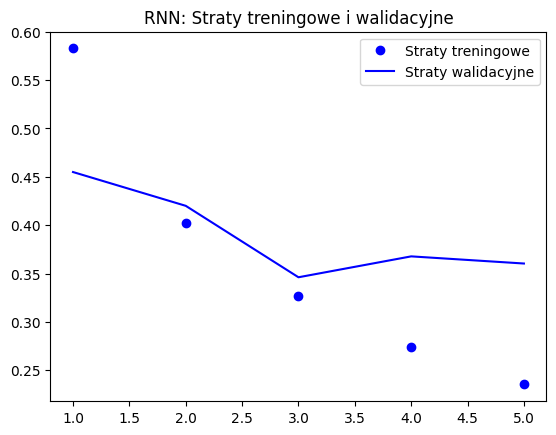

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - acc: 0.8503 - loss: 0.3651
RNN - Strata testowa: 0.3606964349746704
RNN - Dokładność testowa: 0.8543199896812439


In [45]:
# Tworzenie pustego modelu Sequential
model_rnn = Sequential()

# Dodawanie warstwy Embedding do przekształcenia słów w wektory o ustalonej długości
model_rnn.add(Embedding(max_features, 32))
# Parametry: liczba słów traktowanych jako cechy oraz rozmiar wektora reprezentującego każde słowo

# Dodawanie warstwy SimpleRNN z 32 węzłami
model_rnn.add(SimpleRNN(32))
# Parametr: liczba węzłów (rozmiar stanu ukrytego)

# Dodawanie warstwy Dense z jednym węzłem i aktywacją sigmoid
model_rnn.add(Dense(1, activation='sigmoid'))
# Parametry: liczba węzłów (rozmiar wyjścia) oraz funkcja aktywacji (sigmoid dla klasyfikacji binarnej)


# KOMPPILACJA MODELU:
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


# SZKOLENIE MODELOWE:
history_rnn = model_rnn.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Uruchamianie modelu na danych treningowych przez 5 epok z wielkością partii 128 i podziałem na podzbiory treningowe i walidacyjne.


# OPIS MODELU:
model_rnn.summary()


# WYNIKI:
acc_rnn = history_rnn.history['acc']
val_acc_rnn = history_rnn.history['val_acc']
loss_rnn = history_rnn.history['loss']
val_loss_rnn = history_rnn.history['val_loss']

epochs_rnn = range(1, len(acc_rnn) + 1)

plt.plot(epochs_rnn, acc_rnn, 'bo', label='Dokładność treningowa')
plt.plot(epochs_rnn, val_acc_rnn, 'b', label='Dokładność walidacyjna')
plt.title('RNN: Dokładność treningowa i walidacyjna')
plt.legend()

plt.figure()

plt.plot(epochs_rnn, loss_rnn, 'bo', label='Straty treningowe')
plt.plot(epochs_rnn, val_loss_rnn, 'b', label='Straty walidacyjne')
plt.title('RNN: Straty treningowe i walidacyjne')
plt.legend()

plt.show()


# PROGNOZOWANIE PRZY UŻYCIU WYSZKOLONEGO MODELU:
predictions_rnn = model_rnn.predict(input_test)

# Przekształcenie prognoz do postaci binarnej:
binary_predictions_rnn = [1 if pred > 0.5 else 0 for pred in predictions_rnn]

# Porównanie przewidywanych wartości z rzeczywistymi wartościami
for i in range(10):
    print(f"Prognoza: {binary_predictions_rnn[i]}, Rzeczywistość: {y_test[i]}")

# Dodatkowy krok: Ocena modelu
# Ogólna dokładność modelu na danych testowych
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(input_test, y_test)
print('RNN - Strata testowa: {}'.format(test_loss_rnn))
print('RNN - Dokładność testowa: {}'.format(test_acc_rnn))

Tworzenie modelu RNN z głębokimi warstwami:

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 204ms/step - acc: 0.5487 - loss: 0.6875 - val_acc: 0.7328 - val_loss: 0.5400
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 28s 207ms/step - acc: 0.8037 - loss: 0.4471 - val_acc: 0.8600 - val_loss: 0.3405
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 28s 203ms/step - acc: 0.8537 - loss: 0.3421 - val_acc: 0.8507 - val_loss: 0.3609
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - acc: 0.9033 - loss: 0.2558 - val_acc: 0.8603 - val_loss: 0.3784
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 28s 202ms/step - acc: 0.9404 - loss: 0.1687 - val_acc: 0.8351 - val_loss: 0.4430
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 29s 210ms/step - acc: 0.9684 - loss: 0.0946 - val_acc: 0.8313 - val_loss: 0.5186
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 28s 207ms/step - acc: 0.9798 - loss: 0.0609 - val_acc: 0.8267 - val_loss: 0.6121
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - acc: 0.9879 - loss: 0.0388 - val_acc: 0.8153 - val_loss: 0.6461
Epoch 9/10
137/137 ━━━━━━━━━━━━━

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 500, 32)        │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_12 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,388 (2.47 MB)

 Trainable params: 324,193 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324,195 (1.24 MB)

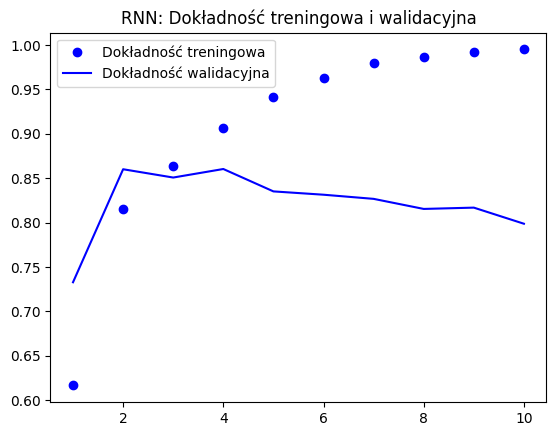

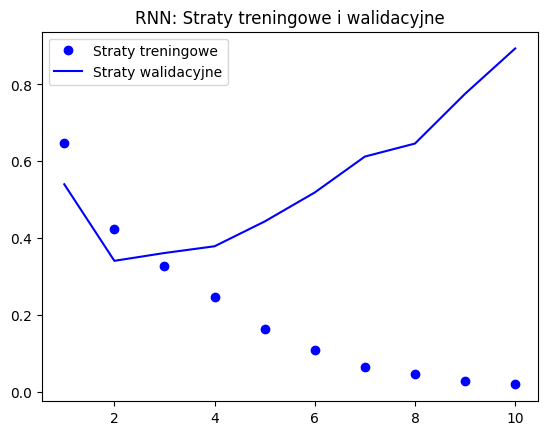

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - acc: 0.7926 - loss: 0.9136
RNN - Strata testowa: 0.9108293652534485
RNN - Dokładność testowa: 0.7949600219726562


In [46]:
# Tworzenie pustego modelu Sequential
model_rnn_2 = Sequential()

# Dodawanie warstwy Embedding do przekształcenia słów w wektory o ustalonej długości
model_rnn_2.add(Embedding(max_features, 32))
# Parametry: liczba słów traktowanych jako cechy oraz rozmiar wektora reprezentującego każde słowo

# Dodawanie pierwszej warstwy SimpleRNN z 32 węzłami
model_rnn_2.add(SimpleRNN(32, return_sequences=True))
# Parametr: liczba węzłów (rozmiar stanu ukrytego) oraz return_sequences=True, aby zwracać pełne sekwencje

# Dodawanie warstwy Dropout
model_rnn_2.add(Dropout(0.2))

# Dodawanie drugiej warstwy SimpleRNN z 32 węzłami
model_rnn_2.add(SimpleRNN(32))
# Parametr: liczba węzłów (rozmiar stanu ukrytego)

# Dodawanie warstwy Dropout
model_rnn_2.add(Dropout(0.2))

# Dodawanie warstwy Dense z jednym węzłem i aktywacją sigmoid
model_rnn_2.add(Dense(1, activation='sigmoid'))
# Parametry: liczba węzłów (rozmiar wyjścia) oraz funkcja aktywacji (sigmoid dla klasyfikacji binarnej)


# KOMPPILACJA MODELU:
model_rnn_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


# SZKOLENIE MODELOWE:
history_rnn_2 = model_rnn_2.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)
# Uruchamianie modelu na danych treningowych przez 5 epok z wielkością partii 128 i podziałem na podzbiory treningowe i walidacyjne.


# OPIS MODELU:
model_rnn_2.summary()


# WYNIKI:
acc_rnn_2 = history_rnn_2.history['acc']
val_acc_rnn_2 = history_rnn_2.history['val_acc']
loss_rnn_2 = history_rnn_2.history['loss']
val_loss_rnn_2 = history_rnn_2.history['val_loss']

epochs_rnn_2 = range(1, len(acc_rnn_2) + 1)

plt.plot(epochs_rnn_2, acc_rnn_2, 'bo', label='Dokładność treningowa')
plt.plot(epochs_rnn_2, val_acc_rnn_2, 'b', label='Dokładność walidacyjna')
plt.title('RNN: Dokładność treningowa i walidacyjna')
plt.legend()

plt.figure()

plt.plot(epochs_rnn_2, loss_rnn_2, 'bo', label='Straty treningowe')
plt.plot(epochs_rnn_2, val_loss_rnn_2, 'b', label='Straty walidacyjne')
plt.title('RNN: Straty treningowe i walidacyjne')
plt.legend()

plt.show()


# PROGNOZOWANIE PRZY UŻYCIU WYSZKOLONEGO MODELU:
predictions_rnn_2 = model_rnn_2.predict(input_test)

# Przekształcenie prognoz do postaci binarnej:
binary_predictions_rnn_2 = [1 if pred > 0.5 else 0 for pred in predictions_rnn_2]

# Porównanie przewidywanych wartości z rzeczywistymi wartościami
for i in range(10):
    print(f"Prognoza: {binary_predictions_rnn_2[i]}, Rzeczywistość: {y_test[i]}")

# Dodatkowy krok: Ocena modelu
# Ogólna dokładność modelu na danych testowych
test_loss_rnn_2, test_acc_rnn_2 = model_rnn_2.evaluate(input_test, y_test)
print('RNN - Strata testowa: {}'.format(test_loss_rnn_2))
print('RNN - Dokładność testowa: {}'.format(test_acc_rnn_2))

Tworzenie prostego modelu LSTM:

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 186ms/step - acc: 0.5690 - loss: 0.6753 - val_acc: 0.7285 - val_loss: 0.5419
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 26s 189ms/step - acc: 0.7995 - loss: 0.4483 - val_acc: 0.8267 - val_loss: 0.4053
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 26s 187ms/step - acc: 0.8566 - loss: 0.3490 - val_acc: 0.8449 - val_loss: 0.3710
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 26s 188ms/step - acc: 0.8804 - loss: 0.3037 - val_acc: 0.8613 - val_loss: 0.3236
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 26s 191ms/step - acc: 0.8928 - loss: 0.2759 - val_acc: 0.8737 - val_loss: 0.3082


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,708 (2.51 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328,355 (1.25 MB)

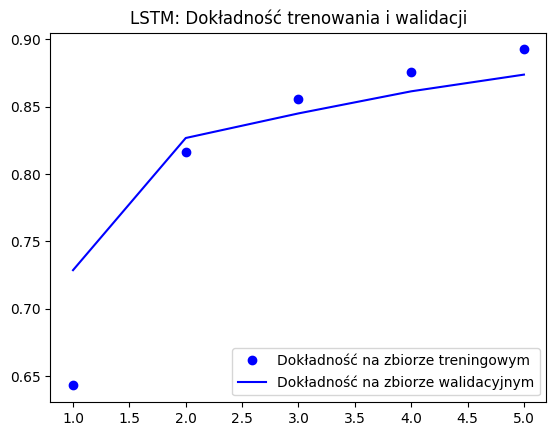

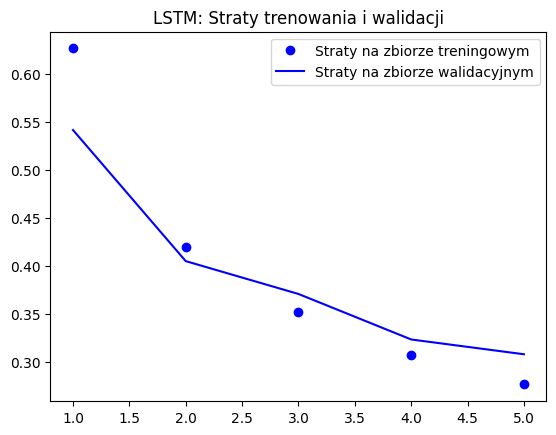

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step
Prognoza: 0, Faktyczne: 0
Prognoza: 1, Faktyczne: 1
Prognoza: 1, Faktyczne: 1
Prognoza: 0, Faktyczne: 0
Prognoza: 1, Faktyczne: 1
Prognoza: 1, Faktyczne: 1
Prognoza: 1, Faktyczne: 1
Prognoza: 0, Faktyczne: 0
Prognoza: 1, Faktyczne: 0
Prognoza: 1, Faktyczne: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - acc: 0.8696 - loss: 0.3150
Strata testowa: 0.3114924430847168
Dokładność testowa: 0.8698800206184387


In [47]:
# Tworzenie pustego modelu Sequential
model_lstm = Sequential()

# Dodanie warstwy Embedding do przekształcenia słów w wektory o ustalonej długości
model_lstm.add(Embedding(max_features, 32))
# Parametry: liczba słów traktowanych jako cechy oraz rozmiar wektora reprezentującego każde słowo

# Dodanie warstwy LSTM z 32 węzłami
model_lstm.add(LSTM(32))
# Parametr: liczba węzłów (rozmiar stanu ukrytego)

# Dodanie warstwy Dense z jednym węzłem i aktywacją sigmoid
model_lstm.add(Dense(1, activation='sigmoid'))
# Parametry: liczba węzłów (rozmiar wyjściowy) oraz funkcja aktywacji (sigmoid dla klasyfikacji binarnej)


# KOMPPILACJA MODELU:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


# SZKOLENIE MODELOWE:
history_lstm = model_lstm.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Trenowanie modelu na danych treningowych przez 5 epok z rozmiarem paczki 128 oraz podziałem na podzbiory treningowe i walidacyjne


# OPIS MODELU:
model_lstm.summary()


# WYNIKI:
acc_lstm = history_lstm.history['acc']
val_acc_lstm = history_lstm.history['val_acc']
loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']

epochs_lstm = range(1, len(acc_lstm) + 1)

plt.plot(epochs_lstm, acc_lstm, 'bo', label='Dokładność na zbiorze treningowym')
plt.plot(epochs_lstm, val_acc_lstm, 'b', label='Dokładność na zbiorze walidacyjnym')
plt.title('LSTM: Dokładność trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs_lstm, loss_lstm, 'bo', label='Straty na zbiorze treningowym')
plt.plot(epochs_lstm, val_loss_lstm, 'b', label='Straty na zbiorze walidacyjnym')
plt.title('LSTM: Straty trenowania i walidacji')
plt.legend()

plt.show()


# PROGNOZOWANIE PRZY UŻYCIU WYSZKOLONEGO MODELU:
predictions_lstm = model_lstm.predict(input_test)

# Przekształcenie do formatu binarnego:
binary_predictions_lstm = [1 if pred > 0.5 else 0 for pred in predictions_lstm]

# Porównanie przewidywanych wartości z rzeczywistymi wartościami
for i in range(10):
    print(f"Prognoza: {binary_predictions_lstm[i]}, Faktyczne: {y_test[i]}")

# Dodatkowy krok: Ocena modelu
# Ogólna dokładność modelu na danych testowych
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)
print('Strata testowa: {}'.format(test_loss_lstm))
print('Dokładność testowa: {}'.format(test_acc_lstm))

Tworzenie modelu LSTM z głębokimi warstwami:

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 59s 420ms/step - acc: 0.5075 - loss: 0.6882 - val_acc: 0.7335 - val_loss: 0.5423
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 408ms/step - acc: 0.7663 - loss: 0.4985 - val_acc: 0.8440 - val_loss: 0.3691
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 413ms/step - acc: 0.8441 - loss: 0.3758 - val_acc: 0.8415 - val_loss: 0.3674
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 410ms/step - acc: 0.8743 - loss: 0.3184 - val_acc: 0.8675 - val_loss: 0.3162
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 421ms/step - acc: 0.8875 - loss: 0.2875 - val_acc: 0.8697 - val_loss: 0.3104
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 464ms/step - acc: 0.9100 - loss: 0.2408 - val_acc: 0.8680 - val_loss: 0.3214
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 53s 390ms/step - acc: 0.9135 - loss: 0.2283 - val_acc: 0.8313 - val_loss: 0.4282
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 394ms/step - acc: 0.9127 - loss: 0.2308 - val_acc: 0.7912 - val_loss: 0.5215
Epoch 9/10
137/137 ━━━━━━━━━━━━━

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 500, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,348 (2.57 MB)

 Trainable params: 336,673 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,675 (1.28 MB)

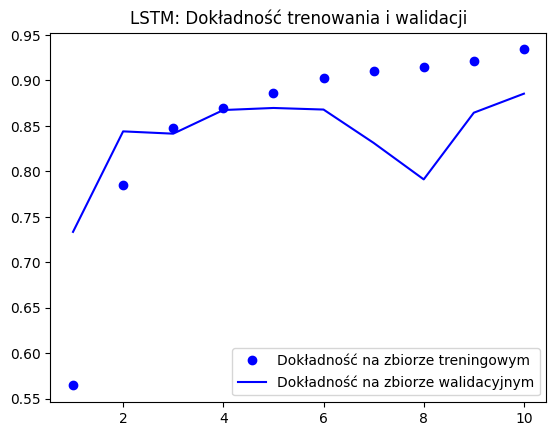

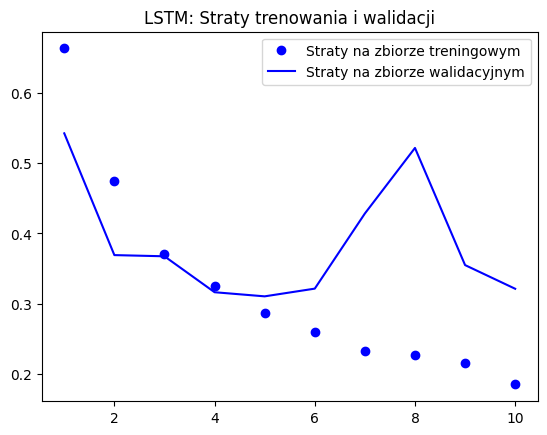

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step
Prognoza: 0, Faktyczne: 0
Prognoza: 1, Faktyczne: 1
Prognoza: 0, Faktyczne: 1
Prognoza: 0, Faktyczne: 0
Prognoza: 1, Faktyczne: 1
Prognoza: 1, Faktyczne: 1
Prognoza: 1, Faktyczne: 1
Prognoza: 0, Faktyczne: 0
Prognoza: 1, Faktyczne: 0
Prognoza: 1, Faktyczne: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - acc: 0.8759 - loss: 0.3447
Strata testowa: 0.3442157506942749
Dokładność testowa: 0.8750799894332886


In [48]:
# Tworzenie pustego modelu Sequential
model_lstm_2 = Sequential()

# Dodanie warstwy Embedding do przekształcenia słów w wektory o ustalonej długości
model_lstm_2.add(Embedding(max_features, 32))
# Parametry: liczba słów traktowanych jako cechy oraz rozmiar wektora reprezentującego każde słowo

# Dodanie pierwszej warstwy LSTM z 32 węzłami
model_lstm_2.add(LSTM(32, return_sequences=True))
# Parametr: liczba węzłów (rozmiar stanu ukrytego) oraz return_sequences=True, aby zwracać pełne sekwencje

# Dodanie warstwy Dropout
model_lstm_2.add(Dropout(0.2))

# Dodanie drugiej warstwy LSTM z 32 węzłami
model_lstm_2.add(LSTM(32))
# Parametr: liczba węzłów (rozmiar stanu ukrytego)

# Dodanie warstwy Dropout
model_lstm_2.add(Dropout(0.2))

# Dodanie warstwy Dense z jednym węzłem i aktywacją sigmoid
model_lstm_2.add(Dense(1, activation='sigmoid'))
# Parametry: liczba węzłów (rozmiar wyjściowy) oraz funkcja aktywacji (sigmoid dla klasyfikacji binarnej)


# KOMPPILACJA MODELU:
model_lstm_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


# SZKOLENIE MODELOWE:
history_lstm_2 = model_lstm_2.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)
# Trenowanie modelu na danych treningowych przez 5 epok z rozmiarem paczki 128 oraz podziałem na podzbiory treningowe i walidacyjne


# OPIS MODELU:
model_lstm_2.summary()


# WYNIKI:
acc_lstm_2 = history_lstm_2.history['acc']
val_acc_lstm_2 = history_lstm_2.history['val_acc']
loss_lstm_2 = history_lstm_2.history['loss']
val_loss_lstm_2 = history_lstm_2.history['val_loss']

epochs_lstm_2 = range(1, len(acc_lstm_2) + 1)

plt.plot(epochs_lstm_2, acc_lstm_2, 'bo', label='Dokładność na zbiorze treningowym')
plt.plot(epochs_lstm_2, val_acc_lstm_2, 'b', label='Dokładność na zbiorze walidacyjnym')
plt.title('LSTM: Dokładność trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs_lstm_2, loss_lstm_2, 'bo', label='Straty na zbiorze treningowym')
plt.plot(epochs_lstm_2, val_loss_lstm_2, 'b', label='Straty na zbiorze walidacyjnym')
plt.title('LSTM: Straty trenowania i walidacji')
plt.legend()

plt.show()


# PROGNOZOWANIE PRZY UŻYCIU WYSZKOLONEGO MODELU:
predictions_lstm_2 = model_lstm_2.predict(input_test)

# Przekształcenie do formatu binarnego:
binary_predictions_lstm_2 = [1 if pred > 0.5 else 0 for pred in predictions_lstm_2]

# Porównanie przewidywanych wartości z rzeczywistymi wartościami
for i in range(10):
    print(f"Prognoza: {binary_predictions_lstm_2[i]}, Faktyczne: {y_test[i]}")

# Dodatkowy krok: Ocena modelu
# Ogólna dokładność modelu na danych testowych
test_loss_lstm_2, test_acc_lstm_2 = model_lstm_2.evaluate(input_test, y_test)
print('Strata testowa: {}'.format(test_loss_lstm_2))
print('Dokładność testowa: {}'.format(test_acc_lstm_2))

Podsumowanie:

In [49]:
print(f"Dokładności modeli:\n- Proste RNN: {test_acc_rnn}\n- Głębokie RNN: {test_acc_rnn_2}\n- Proste LSTM: {test_acc_lstm}\n- Głębokie RNN: {test_acc_lstm_2}")
print("\n\nSzczegóły modeli poniżej.")
print("\n\nMODEL PROSTY RNN:")
model_rnn.summary()
print("#" * 100)
print("\nMODEL GŁĘBOKI RNN:")
model_rnn_2.summary()
print("#" * 100)
print("\nMODEL PROSTY LSTM:")
model_lstm.summary()
print("#" * 100)
print("\nMODEL GŁĘBOKI LSTM:")
model_lstm_2.summary()
print("#" * 100)

Dokładności modeli:
- Proste RNN: 0.8543199896812439
- Głębokie RNN: 0.7949600219726562
- Proste LSTM: 0.8698800206184387
- Głębokie RNN: 0.8750799894332886


Szczegóły modeli poniżej.


MODEL PROSTY RNN:


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,228 (2.46 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,115 (1.23 MB)

####################################################################################################

MODEL GŁĘBOKI RNN:


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 500, 32)        │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_12 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,388 (2.47 MB)

 Trainable params: 324,193 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324,195 (1.24 MB)

####################################################################################################

MODEL PROSTY LSTM:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,708 (2.51 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328,355 (1.25 MB)

####################################################################################################

MODEL GŁĘBOKI LSTM:


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 500, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,348 (2.57 MB)

 Trainable params: 336,673 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,675 (1.28 MB)

####################################################################################################
